# 02 Line Detectors

### Import Packages

In [1]:
import numpy as np
import scipy as sp
import cv2
import time

from matplotlib import pyplot as plt
%matplotlib inline
# set display defaults
plt.rcParams['figure.figsize'] = (15, 15)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

In [2]:
cv2.__version__

'4.2.0'

## Load the image and resize

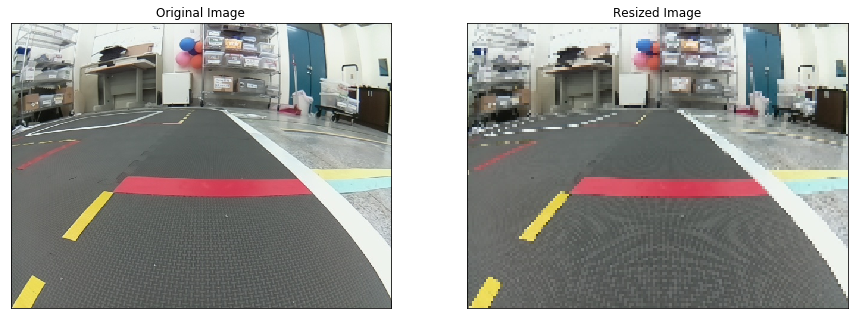

In [3]:
plt.rcParams['figure.figsize'] = (15, 15)

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load Image
img = cv2.imread("images/road.jpg")

# Resize image
image_cv = cv2.resize(img, (160, 120),interpolation=cv2.INTER_NEAREST)

# Covert Color Space
dst1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(dst1,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

dst2 = cv2.cvtColor(image_cv,cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(dst2,cmap = 'brg')
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Reference
Geometric Transformation https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html

## Find the Edges

You should find the config file 'universal.yaml'

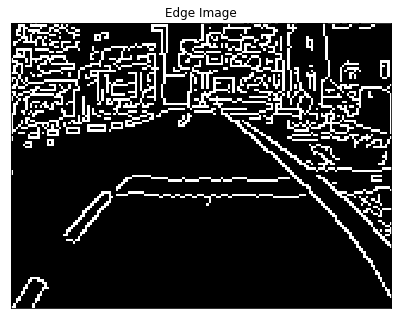

In [4]:
# Conver Color Space (Gray Scale)
gray = cv2.cvtColor(image_cv,cv2.COLOR_BGR2GRAY)
# Find edges with Canny Edge Detector
edges=cv2.Canny(gray,50,150)

plt.subplot(121), plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Reference
Canny Edge Detector https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

## Setup HSV Space Threshold

You should find the config file 'universal.yaml'

In [5]:
# Define the boundaries of "white", "yellow" and "red"
hsv_white1 = np.array([0,0,150])
hsv_white2 = np.array([180,100,255])
hsv_yellow1 = np.array([25,50,50])
hsv_yellow2 = np.array([45,255,255])
# The color "red" needs two set of boundaries cause it pass 255 to 0
hsv_red1 = np.array([0,100,100])
hsv_red2 = np.array([15,255,255])
hsv_red3 = np.array([165,100,100])
hsv_red4 = np.array([180,255,255])

### Threshold colors in HSV space

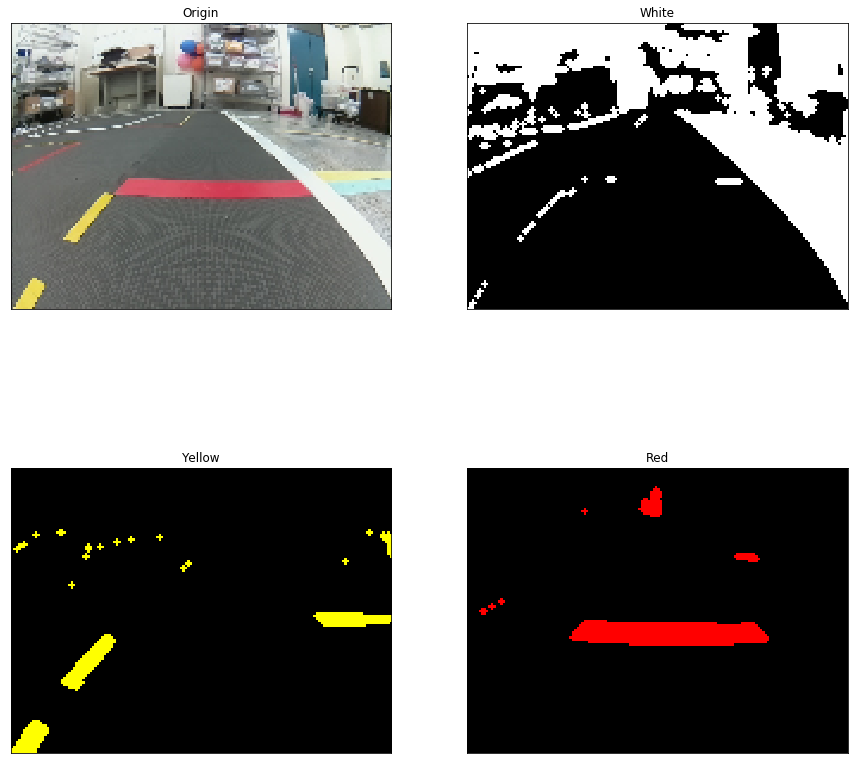

In [7]:
# Covert color space from BGR to HSV
hsv = cv2.cvtColor(image_cv,cv2.COLOR_BGR2HSV)
# Tresholding white
white = cv2.inRange(hsv,hsv_white1,hsv_white2)
# Thresholding yellow
yellow = cv2.inRange(hsv,hsv_yellow1,hsv_yellow2)
# Thresholding red
red1 = cv2.inRange(hsv,hsv_red1,hsv_red2)
red2 = cv2.inRange(hsv,hsv_red3,hsv_red4)
red = cv2.bitwise_or(red1,red2) # Combine both red region
# Make the region a bit wider
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
white = cv2.dilate(white, kernel)
yellow = cv2.dilate(yellow, kernel)
red = cv2.dilate(red, kernel)

# This part is only here for ploting picture #
white_show = cv2.cvtColor(white, cv2.COLOR_GRAY2BGR)
white_show[:,:,2] *= 1
white_show[:,:,1] *= 1
white_show[:,:,0] *= 1
white_show = cv2.cvtColor(white_show, cv2.COLOR_BGR2RGB)

yellow_show = cv2.cvtColor(yellow, cv2.COLOR_GRAY2BGR)
yellow_show[:,:,2] *= 1
yellow_show[:,:,1] *= 1
yellow_show[:,:,0] *= 0
yellow_show = cv2.cvtColor(yellow_show, cv2.COLOR_BGR2RGB)

red_show = cv2.cvtColor(red, cv2.COLOR_GRAY2BGR)
red_show[:,:,2] *= 1
red_show[:,:,1] *= 0
red_show[:,:,0] *= 0
red_show = cv2.cvtColor(red_show, cv2.COLOR_BGR2RGB)

############################################################

plt.subplot(221),plt.imshow(dst2,cmap = 'brg')
plt.title('Origin'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(white_show,cmap = 'gray')
plt.title('White'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(yellow_show,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(red_show,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

plt.show()

#############################################################

### Reference of HSV 

Changing Color Space
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

Dilation
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

### Combine Edge and Colors

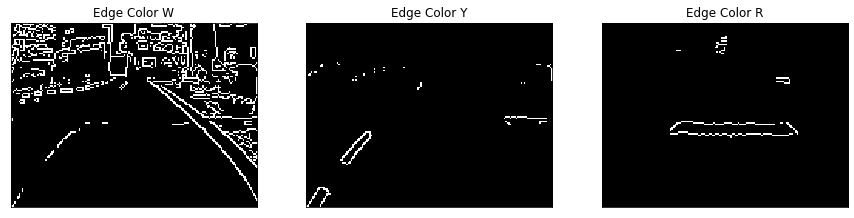

In [8]:
# Use and to combine the result of Edge and color
edge_color_white=cv2.bitwise_and(edges,white)
edge_color_yellow=cv2.bitwise_and(edges,yellow)
edge_color_red=cv2.bitwise_and(edges,red)

plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

### Find the Lines

In [9]:
# Use Probabilistic Hough Line Transform to find lines
lines_white = cv2.HoughLinesP(edge_color_white,1,np.pi/180,10,np.empty(1),1.5,1)
lines_yellow = cv2.HoughLinesP(edge_color_yellow,1,np.pi/180,10,np.empty(1),1.5,1)
lines_red = cv2.HoughLinesP(edge_color_red,1,np.pi/180,10,np.empty(1),1.5,1)

# The result (A 3-diension array)
COLOR = 'YELLOW'
if COLOR == 'YELLOW':
    lines = lines_yellow
    origin_img = edge_color_yellow
elif COLOR == 'WHITE':
    lines = lines_white
    origin_img = edge_color_white
elif COLOR == 'RED':
    lines = lines_red
    origin_img = edge_color_red
    
if lines is not None:
    # Get rid of a dimesion become a 2 dimension array for next step of processing
    lines = lines[:, 0, :]
    print (lines)
    print ("found lines")

else:
    lines = []
    print ("no lines")

[[  9 118  14 111]
 [ 34  83  42  73]
 [  2 116   9 107]
 [ 22  89  36  73]
 [129  61 142  61]
 [ 28  91  37  78]
 [144  62 154  62]
 [ 26  85  38  71]
 [ 38  77  40  75]
 [ 29  88  32  84]
 [ 72  43  74  41]]
found lines


### Reference 

Hough Line Transform
https://docs.opencv.org/3.0-beta/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html

### Show the lines (yellow)

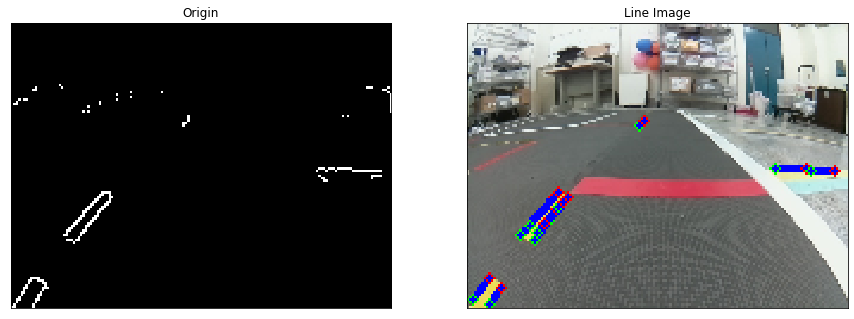

In [10]:
image_with_lines = np.copy(dst2)
if len(lines)>0:
    for x1,y1,x2,y2 in lines:
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.subplot(121),plt.imshow(origin_img,cmap = 'gray')
plt.title('Origin'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Line Image'), plt.xticks([]), plt.yticks([])
plt.show()

## More Examples about Canny Edge Detector 

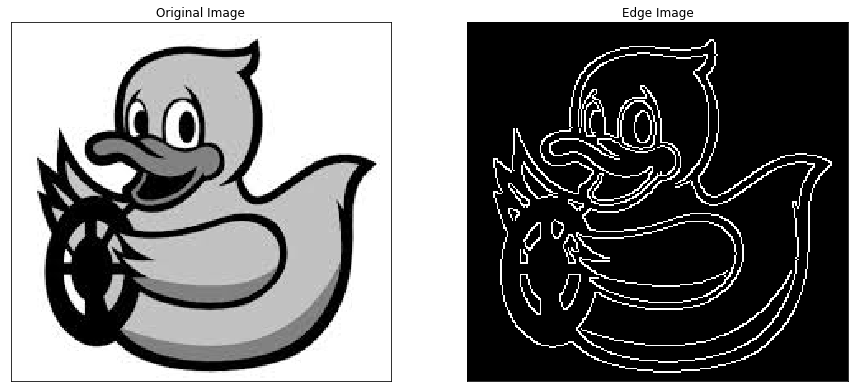

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/duckietown.jpg',0)
edges = cv2.Canny(img,100,200)

#img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

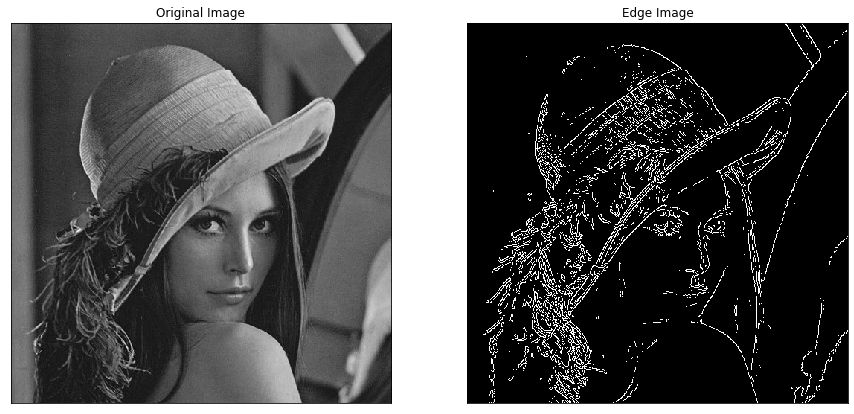

In [12]:
img = cv2.imread('images/lena.bmp',0)
edges = cv2.Canny(img,120, 130)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Reference
About Lena: https://en.wikipedia.org/wiki/Lenna

## More about Filters 

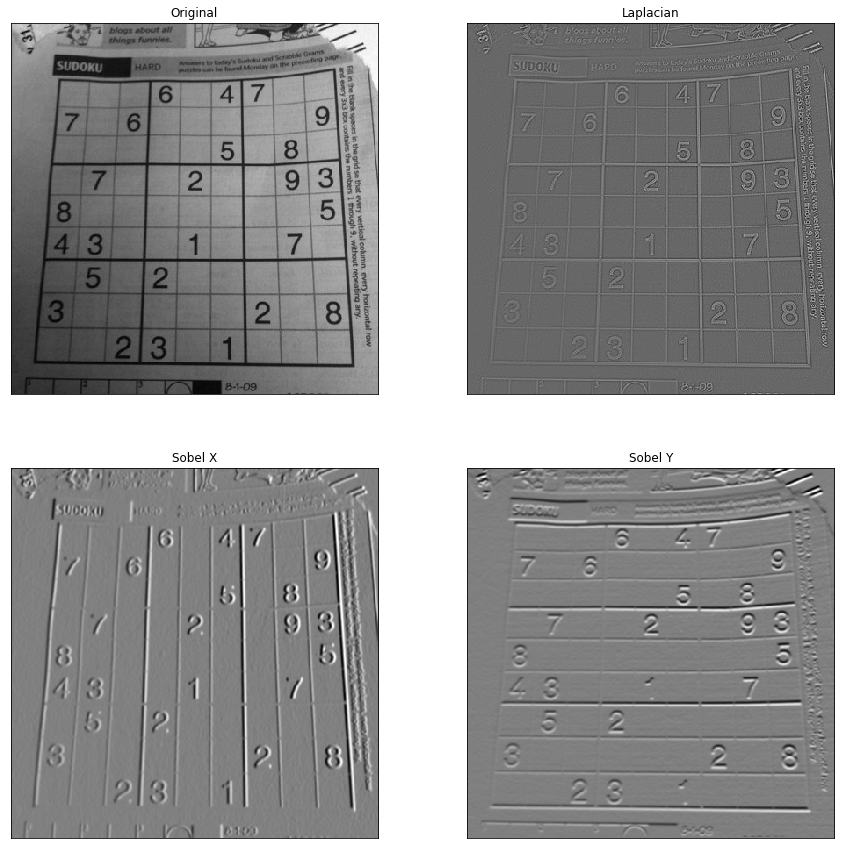

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

### Reference
Image Gradient: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html

## Advanced: More about Convolution and Thresholding

### We can use threshold mask as a tool for object detection

In [14]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

In [15]:
import numpy as np
a = np.zeros((100, 100))

In [16]:
l_mat = np.zeros((5, 5))
l_map = [(1, 2), (2, 2), (3, 2), (3, 3)]
for (i,j) in l_map :
    l_mat[i][j]=100

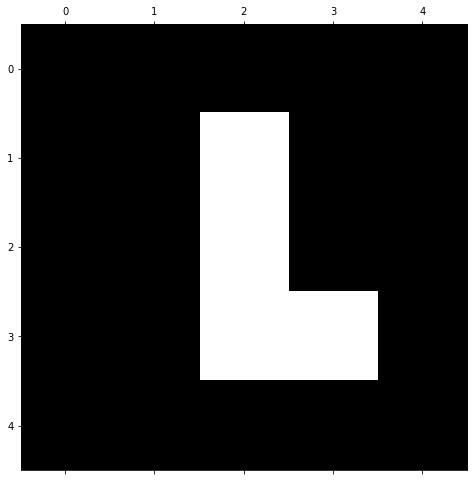

In [17]:
plt.matshow(l_mat, cmap=plt.cm.gray)
plt.show()

In [18]:
# Creatinga map randomly fill with L shpae
for i in range(30) :
    x = int(np.random.random()*94)
    y = int(np.random.random()*94)
    for p in range(l_mat.shape[0]) :
        for q in range(l_mat.shape[1]) :
            if(l_mat[p][q]!=0):
                a[x+p][y+q]=l_mat[p][q]


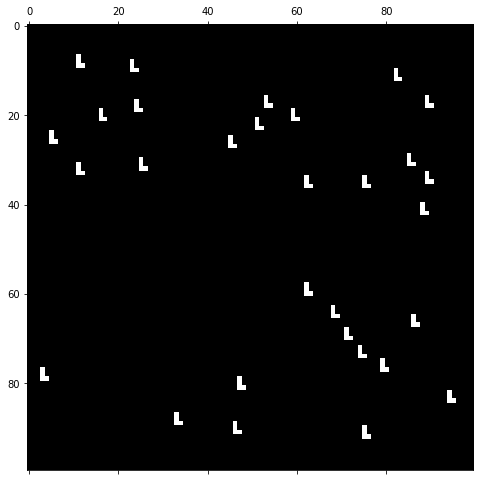

In [19]:
plt.matshow(a, cmap=plt.cm.gray)
plt.show()

In [20]:
# Doing thresholding
threshold = np.zeros((100, 100))
for i in range(a.shape[0]) :
    for j in range(a.shape[1]) :
        if a[i][j] > 95 :
            threshold[i][j]=100

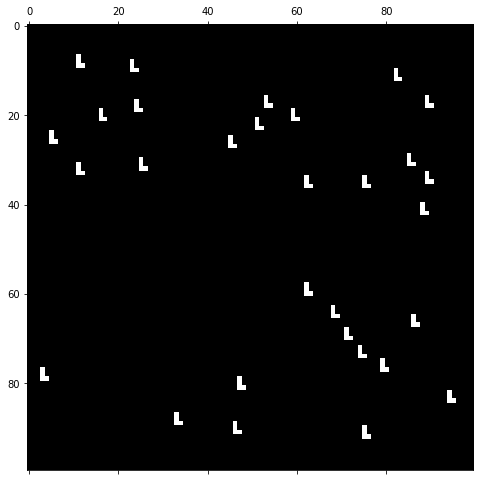

In [21]:
plt.matshow(threshold, cmap=plt.cm.gray)
plt.show()

### Convolution

Using the L shape graph as kernal

In [22]:
from scipy import signal
conv = signal.convolve2d(a, l_mat)

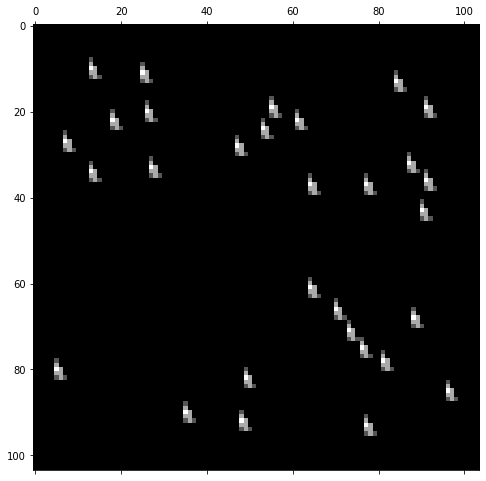

In [23]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.show()

### With Noise

 It seem that adding convoluton is not that good than pure threshold method. 
 
 However, in the real world, there are noises everywhere.

In [24]:
# Creating noises
noise = np.random.random(10000).reshape(100,100)
noise *=100
print (noise)

[[86.2249241  29.23897552 33.49012059 ... 81.94847062 93.81806263
  29.42250002]
 [82.59053549 53.75316537 83.24541344 ... 47.54872633 98.27713323
  52.25681295]
 [54.67943344 98.58820698 62.19644584 ... 71.19459652  2.51068443
  72.34482586]
 ...
 [ 6.20255831 28.76804929  4.82316835 ... 25.35438425 70.15961967
   6.17862   ]
 [21.53557397 79.38275649 27.51816419 ... 92.94577411 98.58132548
  24.77842463]
 [49.56735386 60.80203856 77.36374608 ... 98.9259025  67.44311155
  56.14295008]]


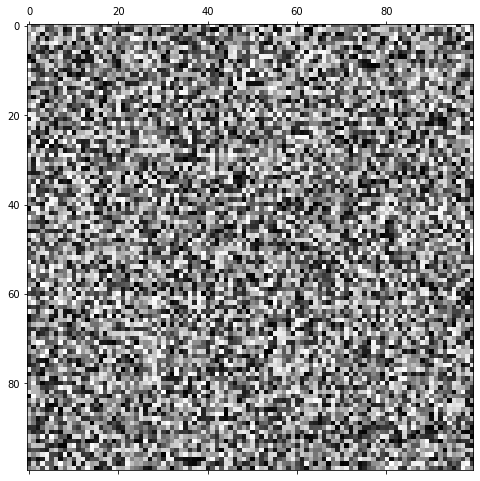

In [25]:
# Noises
plt.matshow(noise, cmap=plt.cm.gray)
plt.show()

In [26]:
noise_a = np.add(noise,a)

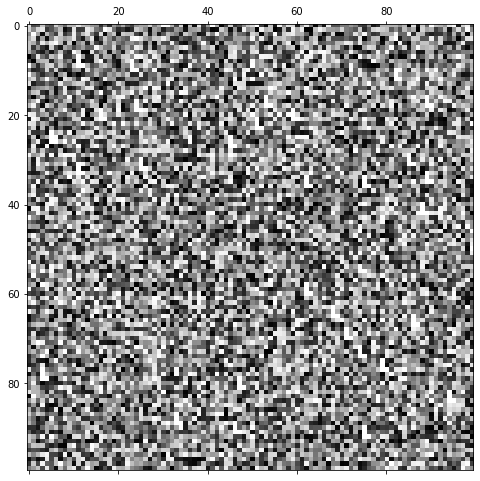

In [27]:
# noises with a lots of L shape inside
plt.matshow(noise_a, vmax=100, cmap=plt.cm.gray)
plt.show()

### If we use pure threshold to detec the shape in a noise environment. How it goes?

In [28]:
threshold = np.zeros((100, 100))
for i in range(noise_a.shape[0]) :
    for j in range(noise_a.shape[1]) :
        if noise_a[i][j] > 98 :
            threshold[i][j]=100

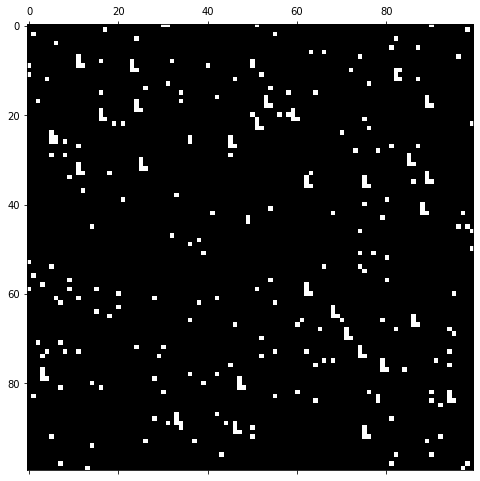

In [29]:
plt.matshow(threshold, vmax=100, cmap=plt.cm.gray)
plt.show()

### How about adding convolution for help?

In [30]:
# First doing convolution
conv = signal.convolve2d(noise_a, l_mat)
conv /= conv.max()
# then thresholding
threshold = np.zeros((100, 100))
for i in range(100) :
    for j in range(100) :
        if conv[i][j] > 0.65 :
            threshold[i][j]=100

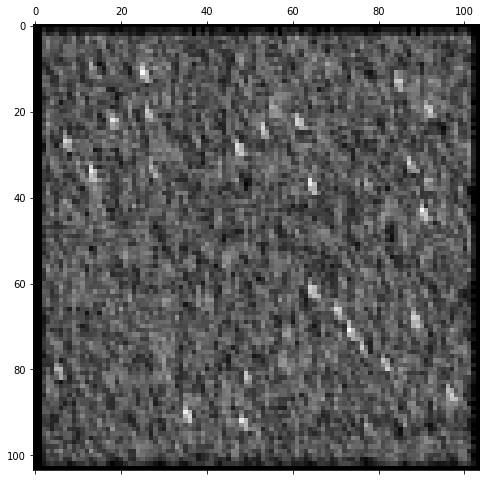

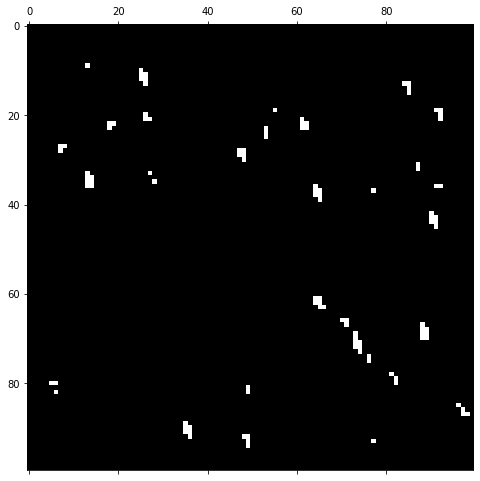

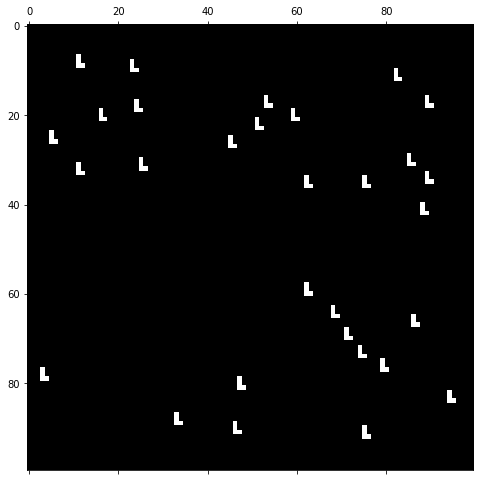

In [31]:
plt.matshow(conv, cmap=plt.cm.gray)
plt.matshow(threshold, cmap=plt.cm.gray)
plt.matshow(a, cmap=plt.cm.gray)
plt.show()